## Задача
Металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали.  Необходимо построить модель, которая предскажет температуру стали, с целью оптимизации производственных издержек компании.

### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Данные
Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.



### План работы над проектом:

<b> 1. Провести исследовательский анализ данных: </b>

   - посмотреть на выборку данных по каждому из источников
   - проверить форматы данных
   - проверить наличие пропусков, аномалий и дубликатов
   - посмотреть на статистические показатели количественных признаков
   - выявить основные закономерности в данных
   - визуализировать имеющиеся данные и закономерности в них
   - сформулировать уточняющие вопросы по дальнейшим этапам
    
    
<b> 2. Провести предобработку данных:</b>

   - решить, как с наименьшими потерями обработать пропуски и аномалии
   - отобрать признаки, которые будут информативными для дальнейшего моделирования
   - возможно, удалить часть признаков или сгенерировать новые признаки на основе имеющихся
   - соединить данные по ключевым признакам в единую таблицу
   - для каждой партии построить технологический цикл обработки металла по временной шкале
   - проверить признаки на наличие мультиколлинеарности
   - разделить выборку на обучающую и тестовую части
    
    
<b> 3. Машинное обучение</b>

   - выбрать несколько моделей для решения задачи регрессии
   - провести необходимую подготовку к моделированию при помощи выбранного регрессора (нормализация данных, например)
   - подсчитать целевую метрику для каждой из моделей с использованием кросс-валидации и подбором гиперпараметров
   - выбрать наилучшую модель по целевому показателю
   - провести анализ важности признаков у модели-победителя
   


<b> 4. Тестирование модели:</b>
   - наилучшую модель на обучающей выборке использовать на тестовой части данных
   - сравнить показатель тестовой выборки с baseline моделью
   - сформулировать вывод


<b> 5. Отчет:</b>
   - написать отчет о проделанной работе с подробными выводами о рекоммендациями в соотвествии с поставленной в начале проекта целью
    

## Исследовательский анализ данных.

Загрузим необходимые библиотеки для исследовательского анализа и предобработки имеющихся данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Данные об электродах

In [2]:
try:
    data_arc = pd.read_csv(r'C:\Users\Марина\Downloads\final_steel\final_steel\data_arc.csv')
except:
    data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')

In [3]:
data_arc.sample(15)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
14094,3064,2019-08-26 12:08:29,2019-08-26 12:11:42,0.656645,0.510317
14810,3226,2019-08-31 16:00:42,2019-08-31 16:02:49,0.578378,0.378031
13537,2938,2019-08-22 01:26:36,2019-08-22 01:31:02,1.152435,0.854794
5534,1203,2019-06-15 22:47:02,2019-06-15 22:54:00,1.814637,1.310490
7550,1643,2019-07-01 03:22:58,2019-07-01 03:25:10,0.511314,0.396548
4135,890,2019-06-05 05:43:52,2019-06-05 05:45:57,0.428124,0.354508
12373,2689,2019-08-12 19:28:59,2019-08-12 19:31:12,0.502196,0.367265
3057,663,2019-05-27 23:00:21,2019-05-27 23:03:27,0.810008,0.599180
2061,443,2019-05-19 17:49:14,2019-05-19 17:50:37,0.279523,0.182081
240,51,2019-05-05 06:01:34,2019-05-05 06:09:39,2.152518,1.434526


In [4]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


Данные о времени хранятся в неверном формате. Проверим наличие пропусков.

In [5]:
data_arc.isna().sum()

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

Пропусков нет. Посмотрим наличие дубликатов.

In [6]:
data_arc.duplicated().sum()

0

Полностью дублирующихся строк нет, проверим статистику распределения данных активной и реативной мощности.

In [7]:
data_arc.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


В глаза бросается очень низкое отрицательное значение реактивной мощности. Посмотрим на диаграммы размаха мощностей и гистограммы их распределения.

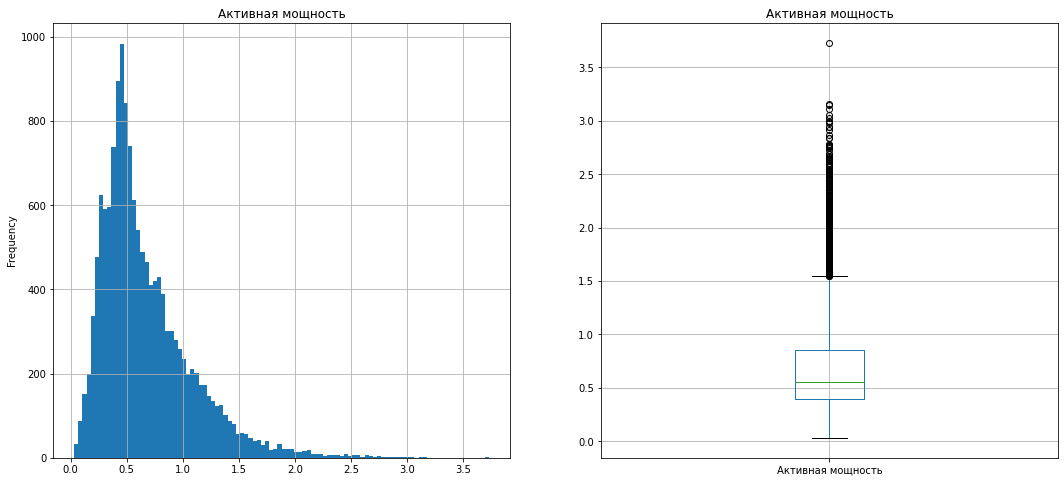

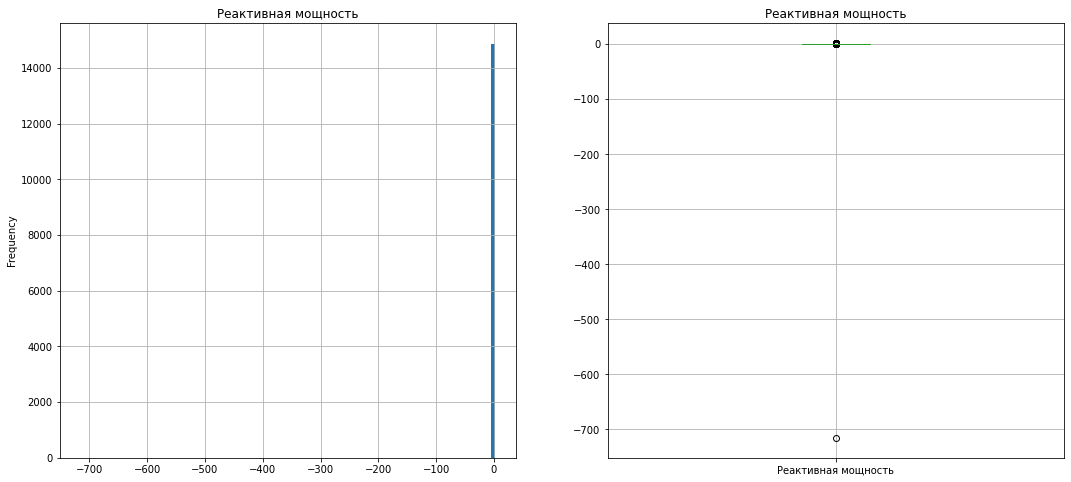

In [8]:
list = ['Активная мощность', 'Реактивная мощность']
for column in list:
    fig, ax = plt.subplots(1,2, figsize=(18,8))
    data_arc[column].plot(kind='hist', title = column, ylabel = 'frequency', bins=100,grid=True, ax=ax[0])   
    data_arc[column].plot(kind = 'box', title= column, grid=True,ax=ax[1])
    plt.show()

Единственное отрицательное значение реактивной мощности можно отнести к выбросу в данных. Предлагается удалить целиком данные о партии с имеющимся аномальным значением. Построим графики для реактивной мощностей без аномально низких измерений.

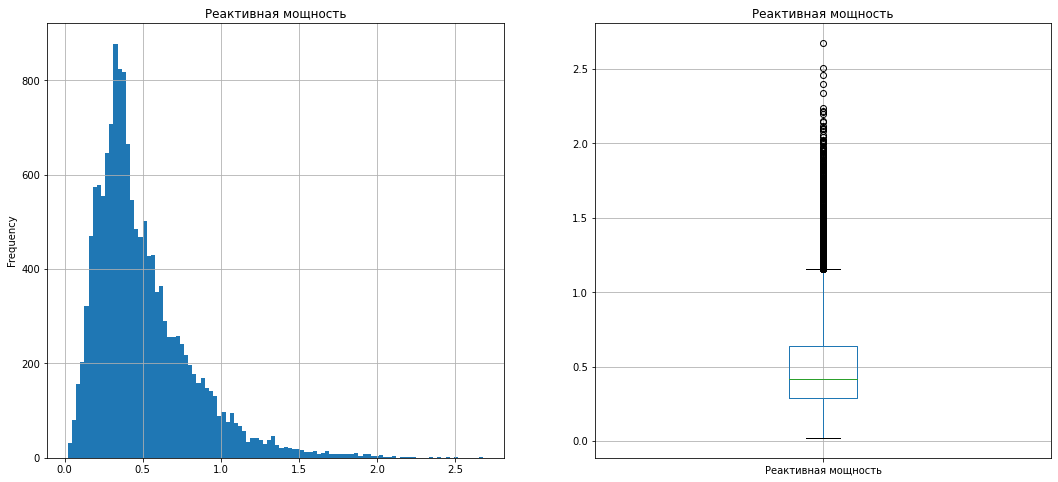

In [9]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
data_arc[data_arc['Реактивная мощность']>0]['Реактивная мощность'].plot(kind='hist', title = column, ylabel = 'frequency', bins=100,grid=True, ax=ax[0])
data_arc[data_arc['Реактивная мощность']>0]['Реактивная мощность'].plot(kind = 'box', title= column, grid=True,ax=ax[1])
plt.show()


Распределение величин явлется нормальным скошенным влево.
Проведем следующую предобработку данных:
- приведем признаки к верному формату
- переименуем названия столбцов

In [10]:
# Приведение данных к нужному формату

data_arc['Начало нагрева дугой'] = pd.to_datetime(data_arc['Начало нагрева дугой'])
data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'])
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


In [11]:
# Переименование столбцов

data_arc.columns = ['key', 'start_heat', 'end_heat', 'active_power', 'reactive_power']

data_arc.head()

,key,start_heat,end_heat,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>ОК

Посмотрим, какое количество раз чаще всего партия подвергается нагреву.

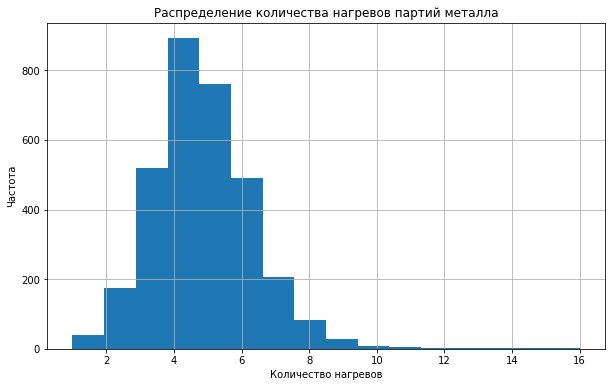

In [12]:
plt.figure(figsize=(10,6))
plt.hist(data_arc.groupby('key')['active_power'].count(), bins=16)
plt.grid()
plt.xlabel('Количество нагревов')
plt.ylabel('Частота')
plt.title('Распределение количества нагревов партий металла')
plt.show()


Чаще всего партию металла нагревают 4-5 раз.

<b> ВЫВОД: Исследованы данные об электродах, есть информация о времени нагрева, а также об активной и реактивной мощности. 
    Отсутствуют пропуски, но есть аномальные значения и неверные форматы данных. Данные изучены, приведены к нужному формату.
</b>

### Данные о подаче сыпучих материалов (объём)

In [13]:
try:
    data_bulk = pd.read_csv(r'C:\Users\Марина\Downloads\final_steel\final_steel\data_bulk.csv')
except:
    data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')

In [14]:
data_bulk.sample(15)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
2119,2191,NaN,NaN,NaN,184.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,332.0,NaN,186.0,183.0
916,955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.0,NaN,102.0,104.0
1676,1736,NaN,NaN,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.0,NaN,119.0,202.0
2731,2834,NaN,NaN,182.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.0,NaN,100.0,104.0
1531,1589,NaN,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.0,NaN,193.0,124.0
2246,2327,NaN,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,110.0,204.0
2372,2459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,157.0,NaN,146.0,106.0
839,875,NaN,NaN,352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408.0,NaN,254.0,203.0
1281,1332,NaN,NaN,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291.0,NaN,129.0,227.0
667,699,NaN,NaN,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,154.0,157.0


In [15]:
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [16]:
data_bulk.isna().sum()

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

Бросается в глаза наличие большого количества пропусков. Проверим уникальность номера партии.

In [17]:
len(data_bulk['key'].unique())

3129

Все номера партий уникальны. Вероятно, пропуски в данных означают, что тот или иной сыпучий материал не был добавлен в сплав. 
Посмотрим, какие из материалов были добавлены в сплав наиболее и наименее часто.

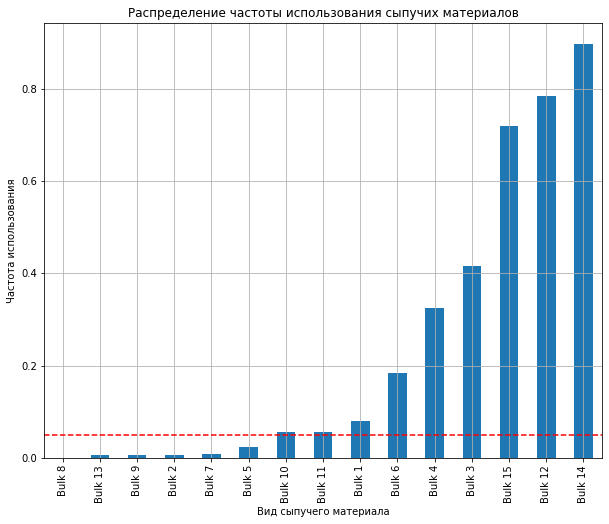

In [18]:
plt.figure(figsize=(10,8))
(data_bulk.drop(['key'], axis=1).isna()==False).mean().sort_values().plot(kind='bar', grid=True)
plt.axhline(0.05, color='r', linestyle='--')
plt.xlabel('Вид сыпучего материала')
plt.ylabel('Частота использования')
plt.title('Распределение частоты использования сыпучих материалов')
plt.show()

Судя по графику, есть сыпучие материалы, которые используются менее, чем в 5% случаев. Возможно, данные о подаче таких материалов могут быть не информативны при моделировании.
Создадим список редких присадок.

In [19]:
(data_bulk.drop(['key'], axis=1).isna()==False).mean().sort_values()<0.05

Bulk 8      True
Bulk 13     True
Bulk 9      True
Bulk 2      True
Bulk 7      True
Bulk 5      True
Bulk 10    False
Bulk 11    False
Bulk 1     False
Bulk 6     False
Bulk 4     False
Bulk 3     False
Bulk 15    False
Bulk 12    False
Bulk 14    False
dtype: bool

In [20]:
rare_bulks = ['Bulk 8', 'Bulk 13', 'Bulk 9', 'Bulk 2', 'Bulk 7', 'Bulk 5'] 

Заменим пропуски наиболее вероятным значением - нулем, то есть материал не подавался для обработки партии.

In [21]:
data_bulk = data_bulk.fillna(0)

In [22]:
data_bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0


<b> ВЫВОД: Исследованы данные об объемах сыпучих материалов. В данных присутствует много пропусков. Наиболее вероятно, что пропуск данных означает, что материал не был использован. Было решено заменить пропуски нулями. Также исследована частота использования того или иного материала. Есть материалы, которые используются очень редко. Возможно информация об их подаче не будет информативна для дальнейшего моделирования.
</b>

### Данные о подаче сыпучих материалов (время)

In [23]:
try:
    data_bulk_time = pd.read_csv(r'C:\Users\Марина\Downloads\final_steel\final_steel\data_bulk_time.csv')
except:
    data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')

In [24]:
data_bulk_time.sample(15)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
1368,1421,2019-06-23 12:23:06,NaN,2019-06-23 12:26:22,2019-06-23 12:46:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-23 12:23:06,NaN,2019-06-23 12:23:06,2019-06-23 12:23:06
567,596,NaN,NaN,NaN,2019-05-25 09:59:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-25 09:48:45,NaN,2019-05-25 09:48:45,2019-05-25 09:48:45
2307,2391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-02 08:48:37,NaN,2019-08-02 08:48:37,NaN
1554,1612,NaN,NaN,NaN,NaN,NaN,2019-06-30 05:51:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-30 05:44:05,NaN
303,322,2019-05-15 09:27:40,NaN,2019-05-15 09:35:53,2019-05-15 09:58:38,NaN,NaN,2019-05-15 09:35:53,NaN,NaN,NaN,NaN,2019-05-15 09:22:19,NaN,2019-05-15 09:22:19,NaN
2199,2279,NaN,NaN,NaN,2019-07-29 04:53:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-29 04:28:20,NaN,2019-07-29 04:28:20,2019-07-29 04:28:20
2821,2927,NaN,NaN,2019-08-21 15:37:35,NaN,NaN,2019-08-21 15:37:35,NaN,NaN,NaN,NaN,NaN,2019-08-21 15:30:34,NaN,2019-08-21 15:30:35,2019-08-21 15:30:34
1563,1621,2019-06-30 12:27:16,NaN,2019-06-30 12:32:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-30 12:27:16,NaN,2019-06-30 12:27:16,NaN
986,1031,NaN,NaN,2019-06-10 06:02:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-10 05:56:38,NaN,2019-06-10 05:56:38,2019-06-10 05:56:38
1682,1742,NaN,NaN,NaN,2019-07-04 03:40:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-04 03:33:32,NaN,2019-07-04 03:33:32,2019-07-04 03:33:32


In [25]:
data_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [26]:
data_bulk.isna().sum()

key        0
Bulk 1     0
Bulk 2     0
Bulk 3     0
Bulk 4     0
Bulk 5     0
Bulk 6     0
Bulk 7     0
Bulk 8     0
Bulk 9     0
Bulk 10    0
Bulk 11    0
Bulk 12    0
Bulk 13    0
Bulk 14    0
Bulk 15    0
dtype: int64

In [27]:
len(data_bulk_time['key'].unique())

3129

Данные о времени подачи сыпучих материалов имеют ту же структуру, что данные об объеме их подачи. Предлагается объединить таблицу по объему и времени подачи сыпучих материалов в единую.

<b> ВЫВОД: Исследованы данные об времени подачи сыпучих материалов. В данных присутствует много пропусков. Наиболее вероятно, что пропуск данных означает, что материал не был использован. Структура данных повторяет таблицу по объему подачи сыпучих материлов, таблицы можно будет объединить.
</b>

### Данные о продувке сплава газом

In [28]:
try:
    data_gas = pd.read_csv(r'C:\Users\Марина\Downloads\final_steel\final_steel\data_gas.csv')
except:
    data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')

In [29]:
data_gas.head(10)

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891


In [30]:
data_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [31]:
data_gas.describe()

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


In [32]:
len(data_gas['key'].unique())

3239

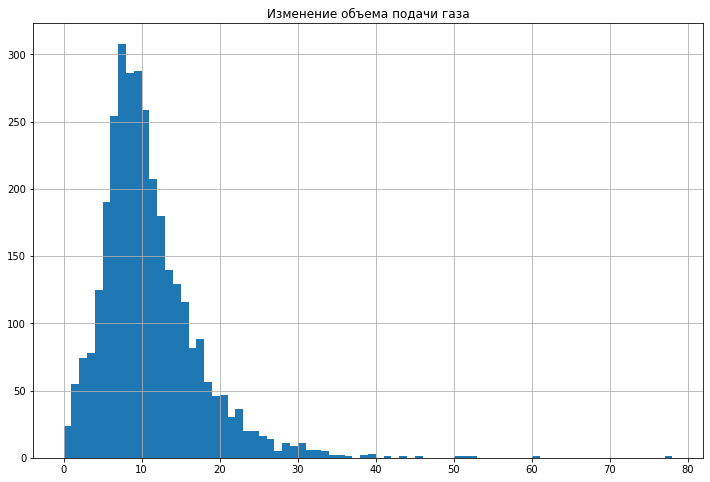

In [33]:
plt.figure(figsize=(12,8))
plt.hist(data_gas['Газ 1'], bins=78)
plt.grid()
plt.title('Изменение объема подачи газа')
plt.show()

In [34]:
data_gas.columns=['key', 'gas']

In [35]:
data_gas.head()

,key,gas
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


<b> ВЫВОД: Исследованы данные о продувке сплава газом. В данных нет пропусков, распределение близкое к нормальному, скошенное влево. Каждой партии соответствует одна запись о продувке газом. Нет временного диапозона продувки газом, в отличие от остальных величин.
</b>

### Результаты измерения температуры

In [36]:
try:
    data_temp = pd.read_csv(r'C:\Users\Марина\Downloads\final_steel\final_steel\data_temp.csv')
except:
    data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')

In [37]:
data_temp.sample(15)

,key,Время замера,Температура
3110,613,2019-05-25 23:37:37,1600.0
9580,1942,2019-07-17 02:40:03,1611.0
15588,3169,2019-08-29 19:00:54,NaN
1161,207,2019-05-10 22:56:24,1586.0
2831,547,2019-05-23 17:31:55,1592.0
3058,600,2019-05-25 12:11:18,1596.0
7738,1570,2019-06-28 22:45:01,1585.0
10788,2185,2019-07-26 04:08:56,1557.0
7040,1430,2019-06-23 19:16:27,1613.0
14246,2893,2019-08-20 08:51:41,NaN


In [38]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


In [39]:
data_temp.isna().sum()

key                0
Время замера       0
Температура     2901
dtype: int64

Присутсвуют партии, у которых не была замерена температура. Посмотрим на статистику целевого признака.

In [40]:
data_temp.describe()

,key,Температура
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


Проверим наличие явных дубликатов.

In [41]:
data_temp.duplicated().sum()

0

Явных дубликатов не обнаружено. Посмотрим на график распределения температуры партии металла. Построим гистограмму распределения и диаграмму размаха.

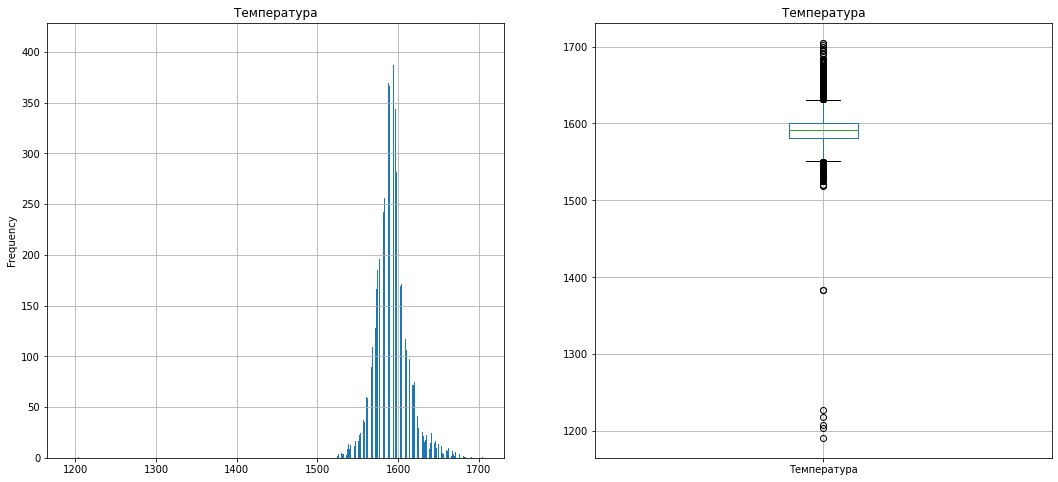

In [42]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
data_temp['Температура'].plot(kind='hist', bins=1000, title = 'Температура',grid=True, ax=ax[0])
data_temp['Температура'].plot(kind = 'box', title= 'Температура', grid=True,ax=ax[1])
plt.show()

Судя по графикам распределение близко к нормальному, есть небольшое количество аномально низких и высоких температур.

Отлельно посмотрим на пропуски в данных.

In [43]:
data_temp_isna = data_temp[data_temp['Температура'].isna()==True]

In [44]:
data_temp_isna.head(20)

,key,Время замера,Температура
12268,2500,2019-08-06 03:24:43,NaN
12269,2500,2019-08-06 03:25:16,NaN
12270,2500,2019-08-06 03:28:21,NaN
12272,2501,2019-08-06 04:01:59,NaN
12273,2501,2019-08-06 04:14:35,NaN
12274,2501,2019-08-06 04:22:14,NaN
12275,2501,2019-08-06 04:31:14,NaN
12277,2502,2019-08-06 04:46:04,NaN
12278,2502,2019-08-06 04:52:32,NaN
12279,2502,2019-08-06 04:57:30,NaN


In [45]:
data_temp_isna['key'].unique()

array([2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510,
       2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521,
       2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532,
       2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543,
       2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554,
       2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565,
       2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576,
       2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587,
       2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598,
       2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609,
       2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620,
       2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631,
       2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642,
       2643, 2644, 2645, 2646, 2647, 2648, 2649, 26

In [46]:
len(data_temp_isna['key'].unique())

739

Пропущены значения в 739 партиях, начиная с 2500ой. Посмотрим на долю пропущенных значений температуры в общем количестве замеров для партии.

In [47]:
data_temp_group = data_temp.groupby(['key']).count()
data_temp_group.sample(10)

,Время замера,Температура
key,,
181,7,7
490,4,4
1625,5,5
896,5,5
2183,4,4
2802,4,1
962,5,5
1335,6,6
1538,6,6


In [48]:
data_temp_group['Температура'].value_counts().sort_values()

14      1
13      1
15      2
16      4
12     12
11     16
10     21
9      43
2      56
8     100
7     182
6     370
3     432
5     585
4     650
1     741
Name: Температура, dtype: int64

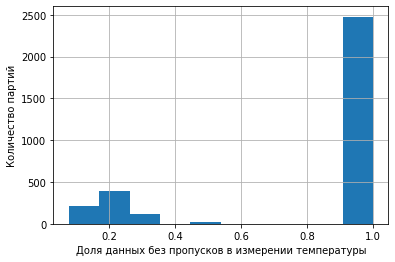

In [49]:
data_temp_group['ratio'] = (data_temp_group['Температура']/data_temp_group['Время замера'])
plt.hist(data_temp_group['ratio'])
plt.grid()
plt.xlabel('Доля данных без пропусков в измерении температуры')
plt.ylabel('Количество партий')
plt.show()

В большинстве случаев есть все значения температурных измерения. Но также есть партии с единичным замером температуры, есть партии с пропущенными значениями температуры в середине технологического процесса.

Переименуем столбцы исходной таблицы.

In [50]:
data_temp.columns=['key', 'time', 'temp']

In [51]:
data_temp.head()

,key,time,temp
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


<b> ВЫВОД: Исследованы данные об измерениях температуры сплавов. Распределение целевого признака (температуры металла) близко к нормальному. Есть пропуски. Предлагается удалить пропущенные значения, а также те партии, в которых присутствует только одно измерение температуры сплава, либо нет конечного измерения. Для этого необходимо будет восстановить технологический процесс для каждой партии поэтапно.
</b>

### Данные о проволочных материалах (объём)

In [52]:
try:
    data_wire = pd.read_csv(r'C:\Users\Марина\Downloads\final_steel\final_steel\data_wire.csv')
except:
    data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')

In [53]:
data_wire.sample(10)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
1508,1587,78.109196,120.187599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2338,2463,126.016800,175.501037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2062,2160,95.135040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971,2068,154.103042,46.205120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442,474,77.220001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,1060,166.701602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2954,3113,102.080162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1700,1787,165.157196,42.314480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2473,2600,30.750720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2065,2163,75.042236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [55]:
data_wire.isna().sum()

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

In [56]:
data_wire.describe()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


Посмотрим на гистограмму распределения и диаграмму размаха объема подачи проволочных материалов.

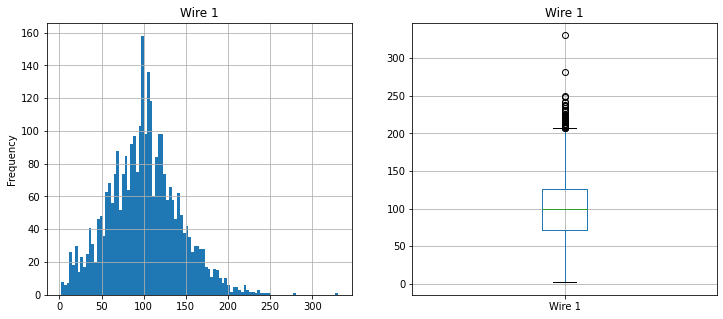

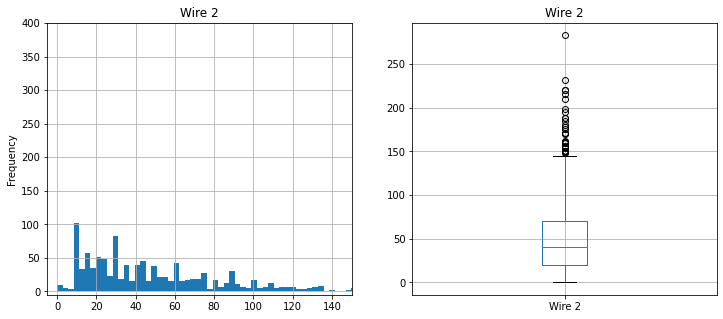

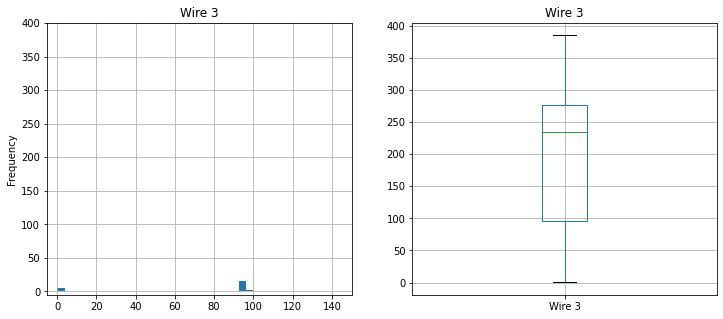

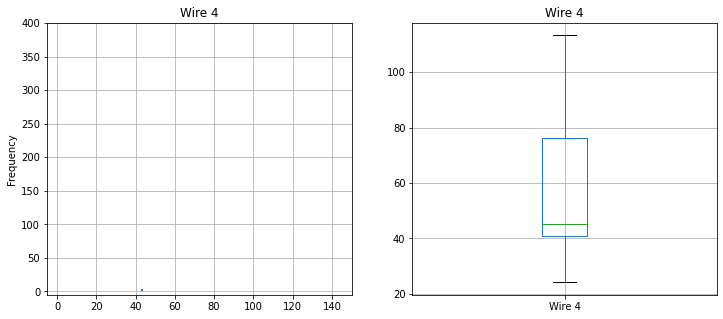

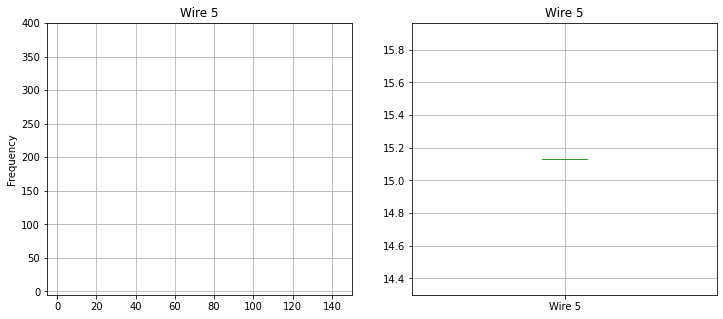

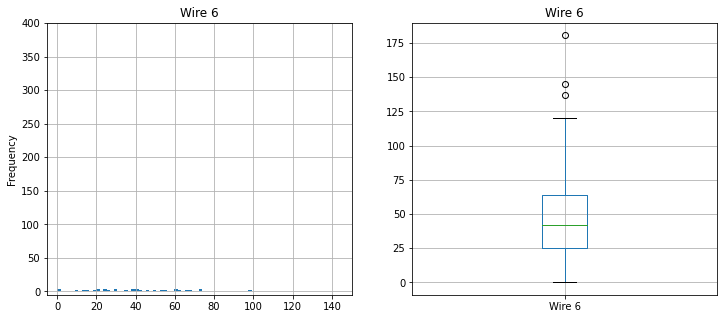

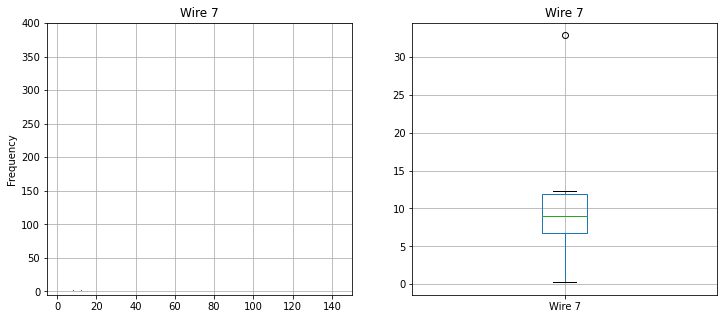

In [57]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
data_wire['Wire 1'].plot(kind='hist', title = 'Wire 1', ylabel = 'frequency', bins=100,grid=True, ax=ax[0])
data_wire['Wire 1'].plot(kind = 'box', title= 'Wire 1', grid=True,ax=ax[1])
plt.show()

list = ['Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7']
for column in list:
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    data_wire[column].plot(kind='hist', title = column, ylabel = 'frequency', bins=100,grid=True, xlim =[-5, 150], \
                                                                                      ylim =[-5, 400], ax=ax[0])
    data_wire[column].plot(kind = 'box', title= column, grid=True,ax=ax[1])
    
    plt.show()
    

Судя по графикам чаще всего используются проволочные материалы wire 1 и wire 2. Распределение их подачи wire 1 близко  к нормальному. Для остальных проволочных материалов видим либо около нулевые значения объема подачи, либо очень редкие. Посмотрим на частоту подачи каждого из материалов.

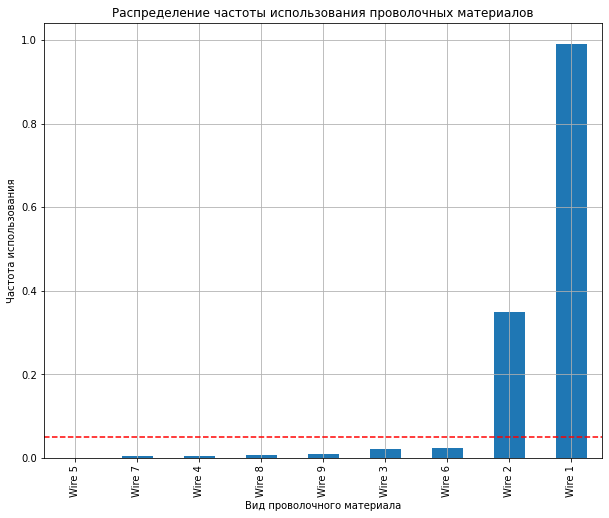

In [58]:
plt.figure(figsize=(10,8))
(data_wire.drop(['key'], axis=1).isna()==False).mean().sort_values().plot(kind='bar', grid=True)
plt.axhline(0.05, color='r', linestyle='--')
plt.xlabel('Вид проволочного материала')
plt.ylabel('Частота использования')
plt.title('Распределение частоты использования проволочных материалов')
plt.show()

Составим список материалов, что были использованы менее чем в 5% партий.

In [59]:
(data_wire.drop(['key'], axis=1).isna()==False).mean().sort_values()<0.05

Wire 5     True
Wire 7     True
Wire 4     True
Wire 8     True
Wire 9     True
Wire 3     True
Wire 6     True
Wire 2    False
Wire 1    False
dtype: bool

In [60]:
rare_wires = ['Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9' ]

Заменим пропуски в данных нулями, как наиболее вероятными значениями.

In [61]:
data_wire = data_wire.fillna(0)

In [62]:
data_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<b> ВЫВОД: Исследованы данные об объемах проволочных материалов. В данных присутствует много пропусков. Наиболее вероятно, что пропуск данных означает, что материал не был использован. Было решено заменить пропуски нулями. Также исследована частота использования того или иного материала. Есть материалы, которые используются очень редко. Возможно информация об их подаче не будет информативна для дальнейшего моделирования.
</b>

### Данные о проволочных материалах (время)

In [63]:
try:
    data_wire_time = pd.read_csv(r'C:\Users\Марина\Downloads\final_steel\final_steel\data_wire_time.csv')
except:
    data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')

In [64]:
data_wire_time.sample(15)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
3030,3189,2019-08-30 12:23:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2509,2642,2019-08-11 04:41:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,406,2019-05-18 12:44:53,2019-05-18 12:47:26,2019-05-18 13:04:48,NaN,NaN,NaN,NaN,NaN,NaN
3061,3222,2019-08-31 12:11:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2238,2349,2019-07-31 15:27:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
629,665,2019-05-28 00:10:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849,903,2019-06-05 15:50:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,191,2019-05-10 10:32:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,80,2019-05-06 05:33:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1442,1514,2019-06-26 20:52:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
data_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


In [66]:
data_wire_time.isna().sum()

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

<b> ВЫВОД: Исследованы данные об времени подачи сыпучих материалов. В данных присутствует много пропусков. Наиболее вероятно, что пропуск данных означает, что материал не был использован. Структура данных повторяет таблицу по объему подачи сыпучих материлов, таблицы можно будет объединить.
</b>

### ВЫВОД. Исследовательский анализ данных:
    Исследованы данные по каждому доступному источнику. Выявлены следующие особенности и закономерности:
    
    - Присутствуют пропуски в данных о замерах температуры (целевой признак), данных об объемах и времени подачи сыпучих и проволочных материалов
    - Есть аномалии в измерении реактивной мощности
    - Чаще всего неверный форматы даты и времени
    - Есть сыпучие и проволочные материалы, которые используюся очень редко (менее чем в 5% партий)
    - Данные можно объединить и восстановить технологический процесс обработки по времени для каждой партии  
    - Все количественные признаки распределены нормально без смещения, либо со смещением влево
    - Данные требуют дальнейшей предобработки, а также группировки по номеру партии.

### Вопросы 
В ходе исследовательского анализа данных и изучения задачи проекта возникли следующие вопросы:

1. Наша цель - построить модель регрессии для предсказания температуры металла для уменьшения издержек компании. Как конкретно предсказанная температура поможет снизить технологические издержки? 

2. Каковы целевые метрики работы модели для заказчика?

3. Какие модели предпочтительнее использовать? С какой базовой моделью будем сравнивать вменяемость нашей модели?

4. Допустимо ли убрать данные об объемах и времени подачи сыпучих и проволочных материалов, которые используются в техлогическом процессе очень редко? и каков порог редкого использования (5-10% партий)?

5. Правильно ли, что в целевом признаке нас интересуют только те партии, в которых присутствуют более одного замера температуры и есть конечный замер температуры (после финального нагрева)? Иначе мы не сможем зафиксировать рост издержек компании на нагрев?

6. Каким образом восстановить технологический процесс обработки металла, если не везде есть время (например, в данных о подаче газа)?

7. С точки зрения процесса обработки важна ли нам и активная, и реактивная мощность? или можно оставить активную можность как мощность "полезную"

8. Целесообразноо ли генеривание фичей на основе имещихся данных (например, общий объем используемых сыпучих материалов на партию или разница во времени нагрева и т.д.)?

Спасибо заранее :)



## Предобработка данных.

### Обработка данных об измерениях температуры

Целевым признаком будущей модели является конечная температура металла в ковше. Проведем предобработку данных data_temp:
    
   - оставим только те партии, в которых есть информация о целевом признаке (есть финальный замер температуры)
   - оставим партии, где есть начальная температура нагрева и конечная температура металла (то есть присутствуют хотя бы два замера температуры)

Сгруппируем данные об измерении температуры по партиям, найдем первое и последнее время измерения температуры.

In [67]:
data_temp_gr = data_temp.groupby('key')['time'].agg(['min', 'max'])
data_temp_gr.columns=['min_time', 'max_time']
data_temp_gr.head()

,min_time,max_time
key,,
1,2019-05-03 11:16:18,2019-05-03 11:30:39
2,2019-05-03 11:37:27,2019-05-03 11:59:12
3,2019-05-03 12:13:17,2019-05-03 12:34:57
4,2019-05-03 12:52:57,2019-05-03 12:59:25
5,2019-05-03 13:23:19,2019-05-03 13:36:01


Подтянем измерения температуры к найденным минимальному и максимальному времени замера, получим данные о начальной и конечной температурах меттала в ковше.

In [68]:
data_temp =  data_temp.set_index('key')
data_temp.head()

,time,temp
key,,
1,2019-05-03 11:16:18,1571.0
1,2019-05-03 11:25:53,1604.0
1,2019-05-03 11:29:11,1618.0
1,2019-05-03 11:30:01,1601.0
1,2019-05-03 11:30:39,1613.0


In [69]:
a = data_temp_gr['min_time'].tolist()
b = data_temp_gr['max_time'].tolist()

In [70]:
data_temp_gr['start_temp'] = data_temp.query('time in @a')['temp']
data_temp_gr['final_temp'] = data_temp.query('time in @b')['temp']
data_temp_gr.head()

,min_time,max_time,start_temp,final_temp
key,,,,
1,2019-05-03 11:16:18,2019-05-03 11:30:39,1571.0,1613.0
2,2019-05-03 11:37:27,2019-05-03 11:59:12,1581.0,1602.0
3,2019-05-03 12:13:17,2019-05-03 12:34:57,1596.0,1599.0
4,2019-05-03 12:52:57,2019-05-03 12:59:25,1601.0,1625.0
5,2019-05-03 13:23:19,2019-05-03 13:36:01,1576.0,1602.0


Удалим все партии с пропусками в финальном замере температуры, таких значений 739.

In [71]:
data_temp_gr[data_temp_gr['final_temp'].isna()]

,min_time,max_time,start_temp,final_temp
key,,,,
2500,2019-08-06 03:11:31,2019-08-06 03:28:21,1539.0,NaN
2501,2019-08-06 03:44:42,2019-08-06 04:31:14,1587.0,NaN
2502,2019-08-06 04:45:26,2019-08-06 05:12:20,1583.0,NaN
2503,2019-08-06 05:32:06,2019-08-06 06:07:35,1603.0,NaN
2504,2019-08-06 06:35:39,2019-08-06 07:04:16,1583.0,NaN
...,...,...,...,...
3237,2019-08-31 22:44:04,2019-08-31 23:05:43,1569.0,NaN
3238,2019-08-31 23:30:31,2019-08-31 23:43:00,1584.0,NaN
3239,2019-09-01 01:31:47,2019-09-01 02:24:15,1598.0,NaN


In [72]:
data_temp_gr = data_temp_gr[~data_temp_gr['final_temp'].isna()]

Проверим, есть ли партии, в которых производился один замер температуры, то есть минимальное время замера равно максимальному. 

In [73]:
data_temp_gr[data_temp_gr['min_time']==data_temp_gr['max_time']]

,min_time,max_time,start_temp,final_temp
key,,,,
195,2019-05-10 14:10:23,2019-05-10 14:10:23,1583.0,1583.0
279,2019-05-13 23:07:28,2019-05-13 23:07:28,1603.0,1603.0


Таких партий всего две, также уберем их из выборки.

In [74]:
data_temp_gr = data_temp_gr[data_temp_gr['min_time']!=data_temp_gr['max_time']]

Проверим наличие пропусков в получившейся таблице и посмотрим на ее размерность.

In [75]:
data_temp_gr.isna().sum()

min_time      0
max_time      0
start_temp    0
final_temp    0
dtype: int64

In [76]:
data_temp_gr.shape

(2475, 4)

Получилось 2475 партий с имеющимся значениям целевого признака и начального замера температуры. Обработаем остальные имеющиеся датасеты, чтобы их можно было присоединить к получившейся таблице по ключу - номеру партии меттала.

In [77]:
data_temp_gr

,min_time,max_time,start_temp,final_temp
key,,,,
1,2019-05-03 11:16:18,2019-05-03 11:30:39,1571.0,1613.0
2,2019-05-03 11:37:27,2019-05-03 11:59:12,1581.0,1602.0
3,2019-05-03 12:13:17,2019-05-03 12:34:57,1596.0,1599.0
4,2019-05-03 12:52:57,2019-05-03 12:59:25,1601.0,1625.0
5,2019-05-03 13:23:19,2019-05-03 13:36:01,1576.0,1602.0
...,...,...,...,...
2495,2019-08-06 00:35:45,2019-08-06 00:54:42,1570.0,1591.0
2496,2019-08-06 01:02:54,2019-08-06 01:29:52,1554.0,1591.0
2497,2019-08-06 01:41:53,2019-08-06 01:53:50,1571.0,1589.0


### Обработка данных о подаче газа

Данные о подаче газа не имеют пропусков, а также содержат информацию только по уникальным номерам партий. Добавим информацию о подаче газа в получившуюся выше таблицу, оставив только партии, по которым есть данные в обоих датасетах. 

In [78]:
data_gas = data_gas.set_index('key')

In [79]:
data_steel = data_temp_gr.join(data_gas, how='inner')
data_steel

,min_time,max_time,start_temp,final_temp,gas
key,,,,,
1,2019-05-03 11:16:18,2019-05-03 11:30:39,1571.0,1613.0,29.749986
2,2019-05-03 11:37:27,2019-05-03 11:59:12,1581.0,1602.0,12.555561
3,2019-05-03 12:13:17,2019-05-03 12:34:57,1596.0,1599.0,28.554793
4,2019-05-03 12:52:57,2019-05-03 12:59:25,1601.0,1625.0,18.841219
5,2019-05-03 13:23:19,2019-05-03 13:36:01,1576.0,1602.0,5.413692
...,...,...,...,...,...
2495,2019-08-06 00:35:45,2019-08-06 00:54:42,1570.0,1591.0,7.125735
2496,2019-08-06 01:02:54,2019-08-06 01:29:52,1554.0,1591.0,9.412616
2497,2019-08-06 01:41:53,2019-08-06 01:53:50,1571.0,1589.0,6.271699


### Обработка данных об электродах

Начнем с удаления аномальных значений. На этапе исследовательского анализа было выявлено одно очень низкое значение реактивной мощности. Удалим целиком из выборки данные по партии с выбросом.

In [80]:
# посмотрим на самые низкие значения в столбце reactive power
data_arc['reactive_power'].sort_values(ascending=True).head()

9780   -715.504924
5596      0.020806
2419      0.021154
4914      0.022485
4633      0.022983
Name: reactive_power, dtype: float64

In [81]:
# смотрим, по какому ключу наблюдается аномально низкое значение
data_arc.iloc[9780]

key                              2116
start_heat        2019-07-24 00:44:48
end_heat          2019-07-24 00:46:37
active_power                 0.495782
reactive_power            -715.504924
Name: 9780, dtype: object

In [82]:
# выведем все строки таблицы по данному ключу
data_arc[data_arc['key']==2116]

,key,start_heat,end_heat,active_power,reactive_power
9778,2116,2019-07-24 00:29:52,2019-07-24 00:31:54,0.433266,0.306141
9779,2116,2019-07-24 00:35:50,2019-07-24 00:38:05,0.620265,0.408352
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924
9781,2116,2019-07-24 00:51:51,2019-07-24 00:52:58,0.299368,0.198796


In [83]:
# удалим из выборки все строки с найденным ключом

data_arc = data_arc[data_arc['key']!=2116]

Данные об электодах не содержат пропусков, однако они не агрегированы по партиям. Добавим признак - полная мощность по каждой из итераций нагрева. Рассчитаем полную можность как квадратный корень из суммы квадратов активной и реактивной мощностей.

In [84]:
data_arc.head()

,key,start_heat,end_heat,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


In [85]:
data_arc['full_power']= (data_arc['active_power']**2 + data_arc['reactive_power']**2)**0.5

In [86]:
data_arc.head()

,key,start_heat,end_heat,active_power,reactive_power,full_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,1.193639
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,0.959010
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,0.896038
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,1.970470
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,0.807239


Сгруппируем данные по номеру партии, применив агрегирующие функции сложения (суммарная полная мощность, затраченная на нагрев партии) и подсчета количества (число итераций нагрева). 

In [87]:
data_arc_gr = data_arc.groupby(['key'])['full_power'].agg(['sum', 'count'])
data_arc_gr.columns = ['full_power', 'heat_iter']
data_arc_gr.head()

,full_power,heat_iter
key,,
1,5.826395,5
2,3.649216,4
3,2.989534,5
4,3.814962,4
5,4.035758,4


Создадим еще один признак - время между началом нагрева (первой итерацией) и завершением процесса (окончание последней итерации). Время переведем в секунды.

In [88]:
data_arc_gr_start_heat_time = data_arc.groupby(['key'])['start_heat'].agg('min')
data_arc_gr_end_heat_time = data_arc.groupby(['key'])['end_heat'].agg('max')
data_arc_gr['heating_time'] = (data_arc_gr_end_heat_time - data_arc_gr_start_heat_time).dt.total_seconds()
data_arc_gr.head()

,full_power,heat_iter,heating_time
key,,,
1,5.826395,5,1583.0
2,3.649216,4,1144.0
3,2.989534,5,1525.0
4,3.814962,4,1093.0
5,4.035758,4,1362.0


Добавим получившиеся признаки к датасету с целевым признаком, оставляя только те партии, по которым есть вся информация по каждому из признаков.

In [89]:
data_steel = data_steel.join(data_arc_gr, how='inner')
data_steel

,min_time,max_time,start_temp,final_temp,gas,full_power,heat_iter,heating_time
key,,,,,,,,
1,2019-05-03 11:16:18,2019-05-03 11:30:39,1571.0,1613.0,29.749986,5.826395,5,1583.0
2,2019-05-03 11:37:27,2019-05-03 11:59:12,1581.0,1602.0,12.555561,3.649216,4,1144.0
3,2019-05-03 12:13:17,2019-05-03 12:34:57,1596.0,1599.0,28.554793,2.989534,5,1525.0
4,2019-05-03 12:52:57,2019-05-03 12:59:25,1601.0,1625.0,18.841219,3.814962,4,1093.0
5,2019-05-03 13:23:19,2019-05-03 13:36:01,1576.0,1602.0,5.413692,4.035758,4,1362.0
...,...,...,...,...,...,...,...,...
2495,2019-08-06 00:35:45,2019-08-06 00:54:42,1570.0,1591.0,7.125735,3.986869,4,1208.0
2496,2019-08-06 01:02:54,2019-08-06 01:29:52,1554.0,1591.0,9.412616,5.057033,6,1406.0
2497,2019-08-06 01:41:53,2019-08-06 01:53:50,1571.0,1589.0,6.271699,2.885017,3,764.0


### Обработка данных об объемах подачи сыпучих материалов

В данных об объемах подачи сыпучих материалов много пропусков, которые решено было заменить нулями (то есть материал не подавался). Все номера партий уникальны (для каждой партии одна строка в таблице). Однако есть материалы, которые в технологическом процессе используются очень редко. Сгруппируем материалы, которые используюся менее чем в 5% партий в единую группу - редкие. Суммируем значения объема подачи по редким сыпучим материалам.

In [90]:
data_bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0


In [91]:
data_bulk.shape

(3129, 16)

In [92]:
data_bulk = data_bulk.set_index('key')
rare_bulks = ['Bulk 8', 'Bulk 13', 'Bulk 9', 'Bulk 2', 'Bulk 7', 'Bulk 5'] 

data_bulk['rare_bulks'] = data_bulk[rare_bulks].sum(axis=1)
data_bulk = data_bulk.drop(rare_bulks, axis=1)
data_bulk

,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,rare_bulks
key,,,,,,,,,,
1,0.0,0.0,43.0,0.0,0.0,0.0,206.0,150.0,154.0,0.0
2,0.0,0.0,73.0,0.0,0.0,0.0,206.0,149.0,154.0,0.0
3,0.0,0.0,34.0,0.0,0.0,0.0,205.0,152.0,153.0,0.0
4,0.0,0.0,81.0,0.0,0.0,0.0,207.0,153.0,154.0,0.0
5,0.0,0.0,78.0,0.0,0.0,0.0,203.0,151.0,152.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3237,0.0,170.0,0.0,0.0,0.0,0.0,252.0,130.0,206.0,0.0
3238,0.0,126.0,0.0,0.0,0.0,0.0,254.0,108.0,106.0,0.0
3239,0.0,0.0,0.0,114.0,0.0,0.0,158.0,270.0,88.0,0.0


In [93]:
data_bulk.shape

(3129, 10)

Добавим получившиеся признаки к датасету с целевым признаком, оставляя только те партии, по которым есть вся информация по каждому из признаков.

In [94]:
data_steel = data_steel.join(data_bulk, how='inner')
data_steel.head()

,min_time,max_time,start_temp,final_temp,gas,full_power,heat_iter,heating_time,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,rare_bulks
key,,,,,,,,,,,,,,,,,,
1,2019-05-03 11:16:18,2019-05-03 11:30:39,1571.0,1613.0,29.749986,5.826395,5,1583.0,0.0,0.0,43.0,0.0,0.0,0.0,206.0,150.0,154.0,0.0
2,2019-05-03 11:37:27,2019-05-03 11:59:12,1581.0,1602.0,12.555561,3.649216,4,1144.0,0.0,0.0,73.0,0.0,0.0,0.0,206.0,149.0,154.0,0.0
3,2019-05-03 12:13:17,2019-05-03 12:34:57,1596.0,1599.0,28.554793,2.989534,5,1525.0,0.0,0.0,34.0,0.0,0.0,0.0,205.0,152.0,153.0,0.0
4,2019-05-03 12:52:57,2019-05-03 12:59:25,1601.0,1625.0,18.841219,3.814962,4,1093.0,0.0,0.0,81.0,0.0,0.0,0.0,207.0,153.0,154.0,0.0
5,2019-05-03 13:23:19,2019-05-03 13:36:01,1576.0,1602.0,5.413692,4.035758,4,1362.0,0.0,0.0,78.0,0.0,0.0,0.0,203.0,151.0,152.0,0.0


### Обработка данных об объемах подачи проволочных материалов

Провторим тот же алгоритм обработки данных, что использовали для сыпучих материалов.

In [95]:
data_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
data_wire.shape

(3081, 10)

In [97]:
len(data_wire['key'].unique())

3081

Сгруппируем редкие проволочные материалы в одну группу. Добавим получившиеся признаки к итоговой таблице.

In [98]:
rare_wires = ['Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9' ]
data_wire = data_wire.set_index('key')

data_wire['rare_wires'] = data_wire[rare_wires].sum(axis=1)
data_wire = data_wire.drop(rare_wires, axis=1)
data_wire

,Wire 1,Wire 2,rare_wires
key,,,
1,60.059998,0.00000,0.0
2,96.052315,0.00000,0.0
3,91.160157,0.00000,0.0
4,89.063515,0.00000,0.0
5,89.238236,9.11456,0.0
...,...,...,...
3237,38.088959,0.00000,0.0
3238,56.128799,0.00000,0.0
3239,143.357761,0.00000,0.0


In [99]:
data_steel = data_steel.join(data_wire, how='inner')
data_steel

,min_time,max_time,start_temp,final_temp,gas,full_power,heat_iter,heating_time,Bulk 1,Bulk 3,...,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,rare_bulks,Wire 1,Wire 2,rare_wires
key,,,,,,,,,,,,,,,,,,,,,
1,2019-05-03 11:16:18,2019-05-03 11:30:39,1571.0,1613.0,29.749986,5.826395,5,1583.0,0.0,0.0,...,0.0,0.0,0.0,206.0,150.0,154.0,0.0,60.059998,0.00000,0.0
2,2019-05-03 11:37:27,2019-05-03 11:59:12,1581.0,1602.0,12.555561,3.649216,4,1144.0,0.0,0.0,...,0.0,0.0,0.0,206.0,149.0,154.0,0.0,96.052315,0.00000,0.0
3,2019-05-03 12:13:17,2019-05-03 12:34:57,1596.0,1599.0,28.554793,2.989534,5,1525.0,0.0,0.0,...,0.0,0.0,0.0,205.0,152.0,153.0,0.0,91.160157,0.00000,0.0
4,2019-05-03 12:52:57,2019-05-03 12:59:25,1601.0,1625.0,18.841219,3.814962,4,1093.0,0.0,0.0,...,0.0,0.0,0.0,207.0,153.0,154.0,0.0,89.063515,0.00000,0.0
5,2019-05-03 13:23:19,2019-05-03 13:36:01,1576.0,1602.0,5.413692,4.035758,4,1362.0,0.0,0.0,...,0.0,0.0,0.0,203.0,151.0,152.0,0.0,89.238236,9.11456,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2019-08-06 00:35:45,2019-08-06 00:54:42,1570.0,1591.0,7.125735,3.986869,4,1208.0,0.0,21.0,...,0.0,90.0,0.0,256.0,129.0,223.0,0.0,89.150879,0.00000,0.0
2496,2019-08-06 01:02:54,2019-08-06 01:29:52,1554.0,1591.0,9.412616,5.057033,6,1406.0,0.0,0.0,...,0.0,122.0,0.0,256.0,129.0,226.0,0.0,114.179527,0.00000,0.0
2497,2019-08-06 01:41:53,2019-08-06 01:53:50,1571.0,1589.0,6.271699,2.885017,3,764.0,0.0,0.0,...,0.0,0.0,0.0,230.0,124.0,226.0,0.0,94.086723,9.04800,0.0


Удалим время измерения начальной и конечной температуры (так как у нас есть длительность процесса нагрева, похожий признак).

In [100]:
data_steel = data_steel.drop(['min_time', 'max_time'], axis=1)

In [101]:
data_steel.head()

,start_temp,final_temp,gas,full_power,heat_iter,heating_time,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,rare_bulks,Wire 1,Wire 2,rare_wires
key,,,,,,,,,,,,,,,,,,,
1,1571.0,1613.0,29.749986,5.826395,5,1583.0,0.0,0.0,43.0,0.0,0.0,0.0,206.0,150.0,154.0,0.0,60.059998,0.00000,0.0
2,1581.0,1602.0,12.555561,3.649216,4,1144.0,0.0,0.0,73.0,0.0,0.0,0.0,206.0,149.0,154.0,0.0,96.052315,0.00000,0.0
3,1596.0,1599.0,28.554793,2.989534,5,1525.0,0.0,0.0,34.0,0.0,0.0,0.0,205.0,152.0,153.0,0.0,91.160157,0.00000,0.0
4,1601.0,1625.0,18.841219,3.814962,4,1093.0,0.0,0.0,81.0,0.0,0.0,0.0,207.0,153.0,154.0,0.0,89.063515,0.00000,0.0
5,1576.0,1602.0,5.413692,4.035758,4,1362.0,0.0,0.0,78.0,0.0,0.0,0.0,203.0,151.0,152.0,0.0,89.238236,9.11456,0.0


In [102]:
data_steel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2328 entries, 1 to 2499
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   start_temp    2328 non-null   float64
 1   final_temp    2328 non-null   float64
 2   gas           2328 non-null   float64
 3   full_power    2328 non-null   float64
 4   heat_iter     2328 non-null   int64  
 5   heating_time  2328 non-null   float64
 6   Bulk 1        2328 non-null   float64
 7   Bulk 3        2328 non-null   float64
 8   Bulk 4        2328 non-null   float64
 9   Bulk 6        2328 non-null   float64
 10  Bulk 10       2328 non-null   float64
 11  Bulk 11       2328 non-null   float64
 12  Bulk 12       2328 non-null   float64
 13  Bulk 14       2328 non-null   float64
 14  Bulk 15       2328 non-null   float64
 15  rare_bulks    2328 non-null   float64
 16  Wire 1        2328 non-null   float64
 17  Wire 2        2328 non-null   float64
 18  rare_wires    2328 non-null 

Проверим наличие пропусков в итоговой таблице.

In [103]:
data_steel.isna().sum()

start_temp      0
final_temp      0
gas             0
full_power      0
heat_iter       0
heating_time    0
Bulk 1          0
Bulk 3          0
Bulk 4          0
Bulk 6          0
Bulk 10         0
Bulk 11         0
Bulk 12         0
Bulk 14         0
Bulk 15         0
rare_bulks      0
Wire 1          0
Wire 2          0
rare_wires      0
dtype: int64

Так выглядит итоговый датасет. Исследуем признаки на мультиколлинеаность.

### Проверка признаков на мультиколлинеарность

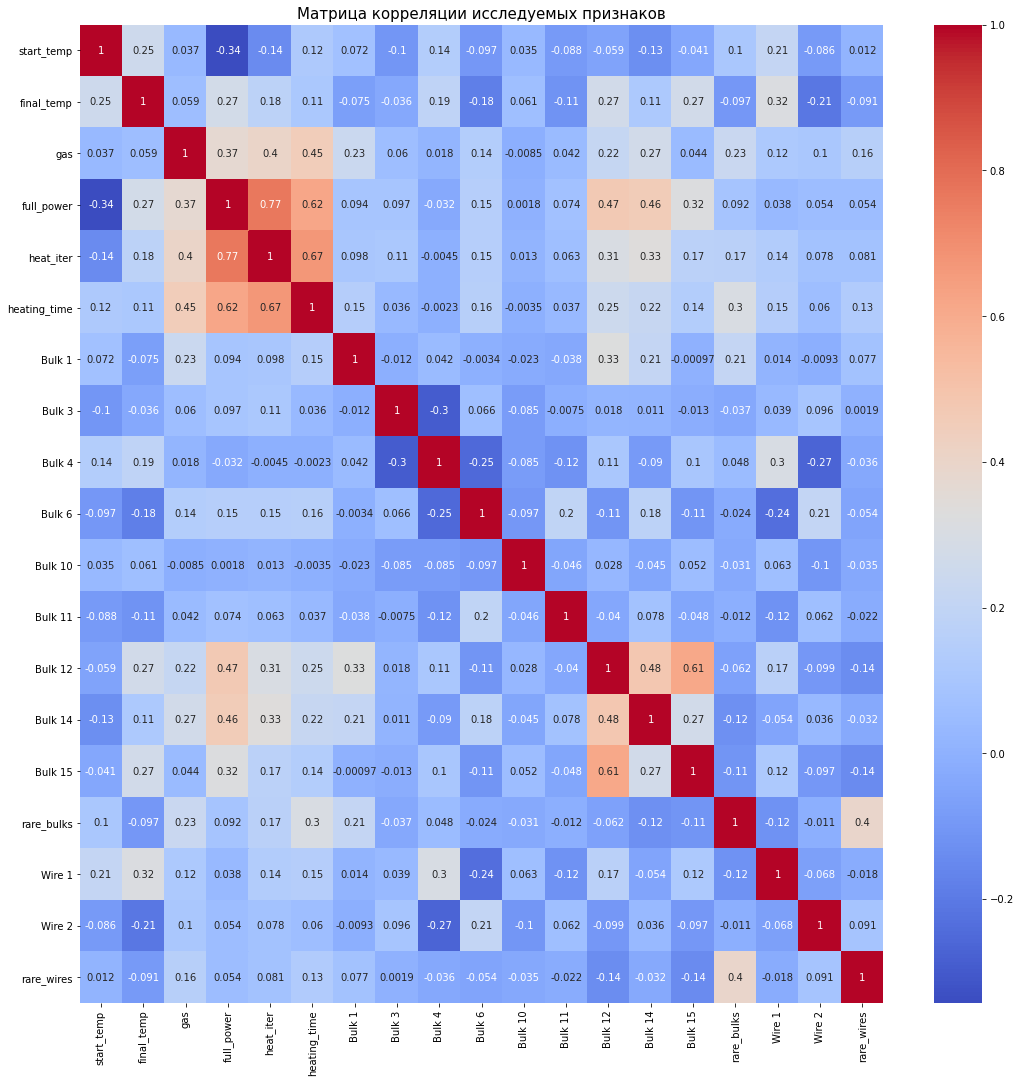

In [104]:
import seaborn as sns

plt.figure(figsize=(18,18))
sns.heatmap(data_steel.corr(), annot = True, cmap = 'coolwarm')
plt.title('Матрица корреляции исследуемых признаков', fontsize = 15)
plt.show()

График наглядно демонстрирует, что очень высокой корреляции (выше 0,9) между исследуемыми признаками не наблюдается. Самый высокий коээфициент корреляции Пирсона между полученными признаками составляет 0,77. Такая корреляция наблюдается междую полной мощностью и количеством итераций нагрева партий. Оставим признаки без изменений, попробуем их все включить в будущую модель.  

### Разделение выборки на обучающую и тестовую 

Разделим выборку на обучающую и тестовую части в соотношении 75% : 25% соответственно. Выделим целевой признак.

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
features = data_steel.drop(['final_temp'], axis = 1)
target = data_steel['final_temp']

In [107]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, \
                                                                            random_state = 100423)

In [108]:
print(features_train.shape)
print(features_test.shape)

(1746, 18)
(582, 18)


Проведена предобработка данных, теперь можно приступить непосредственно к моделированию.

<b>Вывод: </b>
   
   На данном этапе исследования были выполнены следующие шаги и сделаны следующие значимые выводы:
   1. Выделен целевой признак - финальная температура партии металла, удалены те партии, по которым отсутствует последний замер, либо есть только одно измерение температуры.
   
   
   2. Аномалии в полученных температурах металла решено не удалять, так как такие температуры хотя и редки, но в целом возможны в рамках изучаемого технологического процесса.
   
   3. Оставлены первый и последний замеры температуры по каждой из партии, промежуточные измерения удалены.
   
   
   4. Данные об электродах агрегированы по номеру партии, добавлены новые признаки - полная мощность, количество итераций нагрева и время между началом первого нагрева и окончанием последнего нагрева.
   
   
   5. Полученные новые признаки присоединены к обработанным данным с температурой. Данные по активной мощности, реактивной мощности, а также времени начала и конца нагрева решено не включать в моделирование по причине их неифнормативности в чистом виде и явно высокой корреляции между новыми созданными признаками и изначальными данными.
   
   
   6. Удалена одна партия с высокой отрицательной мощностью, так как в исследуемых данных такое значение является явным выбросом
   
   
   7. Без дополнительной предобработки присединены данные о подаче газа
   
   
   8. Присоединены данные об объемах подачи сыпучих и проволочных материалов. Те материалы, которые используются менеее чем в 5% партий объединены в редкие сыпучие материлы и редкие проволочные материалы (данные по объемам суммированы)
   
   
   9. Данные о времени подачи сыпучих и проволочных материалов решено не включать в моделирование. Однако они могут помочь проверить данные на адекватность: сначала должна замеряться температура металла, затем все манипуляции в рамках технологического процесса, затем финальный замер температуры. Если какие-то действия не укладываюся в такой хронологический порядок, очевидно, что в данных есть либо пропуски, либо ошибки.
   
   
   10. Создана итоговая таблица с признаками, каждой партии соответсвует одна строка. По всем признакам нет пропусков. Все данные объединены по ключу - партии металла, с помощью inner join.
   
   
   11. Проведено исследование признаков на мультиколлинеарность. Для этого построена корреляционная матрица. Наибольший коэффициент корреляции между признаками равен 0,77. Все имеющиеся признаки решено включить в моделирование.
   
   
   12. Выборка разделена на обучающую и тестовую части в соотношении 75%:25% соответственно. Выделен целевой признак.

## Машинное обучение

Перейдем непосредственно к моделированию.

Сделаем импорт необходимых библиотек.

In [109]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import  StandardScaler


from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso

from catboost import CatBoostRegressor

from lightgbm import LGBMRegressor

Попробуем построить четыре различные регресиионные модели:
   - CatBoost
   - LightGBM
   - RandomForestRegressor
   - Ridge
   - Lasso

Подберем гиперпараметры, все полученнные результаты по лучшим моделям запомним с целью дальнейшего сравнения и выбора наилучшей.
Целевой метрикой оценки качества модели будет являться MAE.

### CatBoost

In [110]:
%%time

model = CatBoostRegressor(verbose = False, random_state = 100423)

params = { 'n_estimators': [90, 120, 150],
            'learning_rate': [0.05, 0.1, 0.2],
            'depth': [4, 7, 10]}

cat_boost = GridSearchCV(model, params, cv=5, scoring='neg_mean_absolute_error', n_jobs = -1)
cat_boost.fit(features_train, target_train)
cat_boost_best = cat_boost.best_estimator_

print('Наилучшая модель CatBoost:', cat_boost.best_params_)
print(f'MAE_cat_boost = {abs(cat_boost.best_score_).round(3)}')

Наилучшая модель CatBoost: {'depth': 4, 'learning_rate': 0.2, 'n_estimators': 150}
MAE_cat_boost = 5.674
CPU times: user 4min 38s, sys: 2.61 s, total: 4min 41s
Wall time: 5min 46s


Значения целевых метрик по исследуемым моделям сохраним в отдельный список.

In [111]:
results_model =[]
results_model.append({'model': 'CatBoost',
                      'MAE': abs(cat_boost.best_score_).round(3)})


### LightGBM


In [112]:
%%time

model = LGBMRegressor(random_state = 100423)

params = { 'max_depth': [7, 10, 11],
           'learning_rate': [0.05, 0.1, 0.15],
           'n_estimators': [90, 100, 120]}

lgbm  = GridSearchCV(model, params, cv=5, scoring='neg_mean_absolute_error')
lgbm.fit(features_train, target_train)
lgbm_best = lgbm.best_estimator_

print('Наилучшая модель LightGBM:', lgbm.best_params_)
print(f'MAE_lgbm = {abs(lgbm.best_score_).round(3)}')


Наилучшая модель LightGBM: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 90}
MAE_lgbm = 5.659
CPU times: user 18min 26s, sys: 7.74 s, total: 18min 34s
Wall time: 18min 43s


In [113]:
results_model.append({'model': 'LightGBM',
                      'MAE': abs(lgbm.best_score_).round(3)})


### Random Forest

In [114]:
%%time

model = RandomForestRegressor()
params =  {'n_estimators': range(30, 300, 5), 
           'max_depth': [3, 5]}

rf = GridSearchCV(model, params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs = -1)
rf.fit(features_train, target_train)
rf_best =  rf.best_estimator_

print('Наилучшая модель RandomForest:', rf.best_params_)
print(f'MAE_random_forest = {abs(rf.best_score_).round(3)}')

Наилучшая модель RandomForest: {'max_depth': 5, 'n_estimators': 270}
MAE_random_forest = 6.316
CPU times: user 5min 21s, sys: 1.72 s, total: 5min 23s
Wall time: 5min 23s


In [115]:
results_model.append({'model': 'RandomForest',
                      'MAE': abs(rf.best_score_).round(3)})


Для линейных моделей Ridge и Lasso используем масштабированные данные при помощи Standard Scaler. Масштабирование применим через pipeline во избежение утечки данных в рамках кросс-валидации.

### Ridge

In [116]:
%%time                          

model_ridge = Ridge(random_state = 100423)
pipe = make_pipeline(StandardScaler(), model_ridge)
params = {'ridge__alpha': np.arange(0, 5, 0.01)}

ridge = GridSearchCV(pipe, params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs = -1)
ridge.fit(features_train, target_train)
ridge_model_best = ridge.best_estimator_

print('Наилучшая модель Ridge:', ridge.best_params_)
print(f'MAE_ridge = {abs(ridge.best_score_).round(3)}')

Наилучшая модель Ridge: {'ridge__alpha': 0.0}
MAE_ridge = 5.87
CPU times: user 49.5 s, sys: 1min 21s, total: 2min 11s
Wall time: 2min 11s


In [117]:
results_model.append({'model': 'Ridge',
                      'MAE': abs(ridge.best_score_).round(3)})


### Lasso

In [118]:
%%time

model_lasso = Lasso(random_state=100423)

pipe = make_pipeline(StandardScaler(), model_lasso)
params = {'lasso__alpha': [0.15, 0.2, 0.25, 0.3],
          'lasso__max_iter': range(500, 1200, 50),
          'lasso__selection': ['cyclic', 'random']}

lasso = GridSearchCV(pipe, params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs = -1)
lasso.fit(features_train, target_train)
lasso_model_best = lasso.best_estimator_

print('Наилучшая модель Ridge:', lasso.best_params_)
print(f'MAE = {abs(lasso.best_score_).round(3)}')

Наилучшая модель Ridge: {'lasso__alpha': 0.15, 'lasso__max_iter': 500, 'lasso__selection': 'cyclic'}
MAE = 5.914
CPU times: user 24.4 s, sys: 33.4 s, total: 57.8 s
Wall time: 57.8 s


In [119]:
results_model.append({'model': 'Lasso',
                      'MAE': abs(lasso.best_score_).round(3)})


Посмотрим на лучшие метрики всех использованных выше моделей.

In [120]:
results_model = pd.DataFrame(results_model)
results_model

,model,MAE
0,CatBoost,5.674
1,LightGBM,5.659
2,RandomForest,6.316
3,Ridge,5.870
4,Lasso,5.914


Самую низкую среднюю абсолютную ошибку удалось получить используя модель LightGBMRegressor. 

<b> Вывод:</b> 
 
 На данном этапе проведено моделирование с использованием следующих моделей:
 - CatBoost
 - LightGBM
 - RandomForestRegressor
 - Ridge
 - Lasso

Для каждой модели осуществлен поиск гиперпараметов с помощью GridSearchCV (метода подбора наилучших гиперпараметров со встроенной кросс-валидалицией). Для каждой модели удалось перебрать 2-3 гиперпараметра.

Для линейных регрессионных моделей перед моделированием проведено масштабирование данных с использованием pipeline.

Проведено сравнение полученных моделей по целевой метрике качества - средней абсолютной ошибке.
Наименьшее значение MAE получено для модели LightGBMRegressor. Оно составило 5.659.


## Тестирование модели

Проверим работу модели на тестовых данных.

In [121]:
predictions_lgbm = lgbm_best.predict(features_test)

mae_test = mean_absolute_error(target_test, predictions_lgbm)
print(f'MAE модели на тестовой выборке: {mae_test.round(3)}')

MAE модели на тестовой выборке: 5.767


Проведем анализ важности признаков у итоговой модели.

full_power      364
start_temp      353
heating_time    281
Wire 1          221
gas             204
Bulk 14         201
Bulk 12         114
Wire 2           96
Bulk 15          76
Bulk 6           71
Bulk 3           69
rare_wires       55
Bulk 4           39
heat_iter        38
Bulk 1           30
rare_bulks       24
Bulk 11          16
Bulk 10          10
dtype: int32


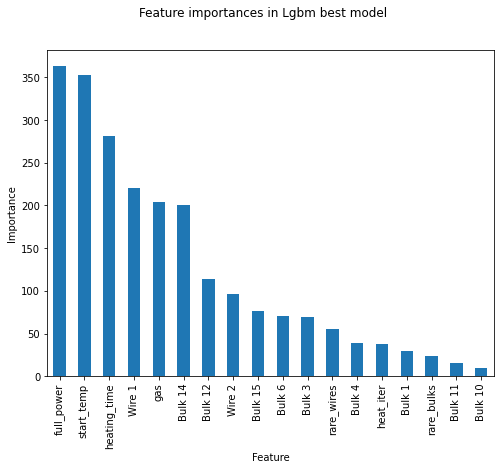

In [122]:
feature_importances = pd.Series(lgbm_best.feature_importances_, index=features_train.columns)
print(feature_importances.sort_values(ascending=False))
feature_importances.sort_values(ascending=False).plot(figsize = (8,6), kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.suptitle("Feature importances in Lgbm best model")
plt.show()

Наиболее значимыми факторами для итоговой модели, оказывающими максимальное влияние на целевой признак (финальную температуру металла в ковше) являются полная мощность, затраченная на нагрев партии, начальная температура металла, измеренная на старте технологического процесса, а также длительность нагрева.

Оценим адекватность построенной модели, сравним ее с константной моделью, предсказаниями которой будет медианное значение температуры.

In [123]:
from sklearn.dummy import DummyRegressor
model = DummyRegressor(strategy='median')
model.fit(features_train, target_train)
predictions_dummy = model.predict(features_test)
mae_dummy = mean_absolute_error(target_test, predictions_dummy)

print(f'MAE константной модели на тестовой выборке: {mae_dummy.round(3)}')

MAE константной модели на тестовой выборке: 7.954


<b> Вывод:</b> 
 
 Проведена проверка итоговой модели на тестовой выборке. Модель показала хороший результат сравнимый с показателем, полученным на обучающих данных.
 MAE на тестовой выборке у итоговой модели равно 5.767 (результат на трейне 5.659).
 
 
Для итоговой выбранной модели осуществлен анализ важности признаков. Наиболее значимыми факторами оказались полная мощность, затраченная на нагрев партии, начальная температура металла в ковше и длительность нагрева.
 
 Модель также успешно прошла сравнение с константной моделью, результат которой составил MAE 7.954 на тестовых данных.
 
 Можно сделать вывод, что полученная модель адекватна поставленной задаче и может быть успешно применена для решения исследуемой проблематики.
 

## Отчет

Данный проект был выполнен с целью решения задачи оптимизации издержек 
потребления электроэнергии у компании, занимающейся обработкой стали.

Для этого необходимо было построить адекватную имеющимся данным модель машинного
обучения и решить задачу регрессии - наиболее точно предсказать финальную температуру
стали в ковше.

Целевой метрикой качества модели считалась средняя абсолютная ошибка (MAE).

В начале работы над проектом был составлен <b> план работы.</b>

<b> 1. Провести исследовательский анализ данных  </b>
(выявление закономерностей и особенностей данных, проверка форматов хранения,
наличия пропусков, аномалий и дубликатов, поверка статистичеких
показателей по количественным признакам).

Данный пункт удалось выполнить в полном объеме. 
Все найденные закономерности визуализированы и подробно описаны. 

<u>Ключевые выводы</u> на данном этапе следующие:
- в данных есть признаки, которые разделены по временным интервалам, а есть не привязанные ко времени
- для моделирования необходима будет агрегация по партиям товаров
- есть пропуски, есть признаки, которые скорее всего будут неинформативны
- есть явные аномалии по одному из признаков
- распределение количественных признаков близко к нормальному

Возник ряд уточняющих вопросов к заказчику, в том числе, касающихся технологического 
процесса и о того, как планируется внедрять модель в реальное производство.
После получения ответов удалось перейти к следующему шагу работы над проектом.

<b> 2. Предобработка данных</b>

<u>Целью </u> данного этапа была подготовка итоговой таблицы с признаками и 
целевым показателем, которые можно было бы использовать непосредственно 
в моделировании.

Первым <u> самым важным шагом </u> в данной части исследования стала подготовка 
целевого признака: удаление партий с отсутствующим финальным замером,
удаление промежуточных неинформативных измерений, очистка выборки от информации по
партиям, где присутствует только одно измерение.

Все остальные имеющиеся выборки также были обработаны:
агрегированы по партиям металла, были созданы новые признаки на основе имеющихся 
(суммарная полная мощность, длительность нагрева партии, количество нагревов),
часть признаков объединены в один блок (редкие сыпучие и проволочные материалы), 
часть признаков удалены( например, временные данные, так как в данном случае
они были неиформативны для моделирования).

Удалось создать выборку по 2328 уникальным партиям металла с информацией 
по 19 признакам, включая целевой признак - финальную температуру металла в ковше.

Итовые признаки были проверены на мультиколлинеарность, построена матрица корреляции.
Все полученнные признаки было решено включить в будущую модель,
поскольку максимальный коэффициент составил 0,77.

Затем выборка была разделена на обучающую и тестовую части в соотношении 
75%:25% соответственно.

Все части предобработки данных удалось выполнить в соответствии с планом, кроме 
восстановления технологического цикла обработки меттала на каждой партии металла по
времени. 

Это отдельный пункт, связанный с проверкой данных на адекватность: сначала должна 
замеряться температура металла, затем все манипуляции в рамках технологического 
процесса, затем финальный замер температуры. 
Если какие-то действия не укладываюся в такой хронологический порядок, очевидно, 
что в данных есть либо пропуски, либо ошибки.

<u> Предобработка данных стала ключевым этапом в работе над проектом</u>, так как имеющаяся 
выборка требовала ряда манипуляций с целью построения информативной выборки для
дальнейшего успешного моделирования.

<b>3. Машинное обучение</b>
  
Целью данного этапа было провести непосредственное моделирование при помощи
различных регрессионных моделей, сравнить полученные метрики качества моделей между 
собой и выбрать наилучшую итоговую модель.

В рамках машинного моделирования были построены следующие регрессионные модели:
   - CatBoost
   - LightGBM
   - RandomForestRegressor
   - Ridge
   - Lasso

Для каждой модели осуществлен поиск гиперпараметов с помощью GridSearchCV 
(метода подбора наилучших гиперпараметров со встроенной кросс-валидалицией). 
Для каждой модели удалось перебрать 2-3 гиперпараметра.

Для линейных регрессионных моделей (Rigde, Lasso) перед моделированием 
проведено масштабирование 
данных с использованием pipeline.
Модели показали следующие метрики качества на обучающей выборке.

	CatBoost MAE =	5.674
    LightGBM MAE =	5.659
    RandomForest MAE = 6.320
    Ridge MAE =	5.870
    Lasso MAE = 5.914

Наилучшей моделью по показателю средней абсолютной ошибки стала модeль 
LightGBMRegressor.

<b> 4. Тестирование модели</b>

В данной части исследования полученная итоговая модель была проверена 
на тестовых данных, затем проводилось сравнение с метрикой качества 
константной модели на тех же данных, а также анализировалась важность
признаков модели-победителя.

Эти шаги удалось выполнить в полном объеме.

Итоговой моделью стала LightGBMRegressor со следующими гиперпараметрами:
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 90, 'random_state' = 100123}
MAE на тестовой выборке = 5.767

Модель адекватна поставленной задаче и значительно превосходит по качеству
константную модель с медианными предсказаниями температуры (MAE на тестовых данных
константной модели составило 7.954).

При моделировании были использованы следующие признаки:
 - full_power - полная суммарная нагрева партии
 - start_temp - начальная температура металла
 - heating_time - длительность нагрева
 - Wire 1  - объем подачи проволочного материала 1
 - gas - объем подачи газа
 - Bulk 14 - объем подачи сыпучего материала 14
 - Bulk 12 - объем подачи сыпучего материала 12
 - Wire 2 - объем подачи проволочного материала 2
 - Bulk 15 - объем подачи сыпучего материала 15
 - Bulk 6 - объем подачи сыпучего материала 6
 - Bulk 3 - объем подачи сыпучего материала 3
 - rare_wires - объем подачи редких проволочных матпериалов
 - Bulk 4 - объем подачи сыпучего материала 4
 - heat_iter - количество раз, которое партия металла подвергалась нагреву
 - Bulk 1 - объем подачи сыпучего материала 1
 - rare_bulks - объем подачи редких сыпучих материалов
 - Bulk 11 - объем подачи сыпучего материала 11
 - Bulk 10 - объем подачи сыпучего материала 10

Анализ важности признаков итоговой модели позволил выяснить, что наибольшее влияние 
на итоговую температуру металла в ковше больше всего влияют полная мощность,
затраченная на нагрев партии, начальная температура металла и длительность нагрева.

И это <u> исследование важности факторов также можно отнести к ключевому этапу исследования </u>.
Оно дает представление о том, как можно использовать построенную модель,
а также усовершенствовать ее и применить в реальном производстве.

<b>Рекомендации.</b>

<u> Цель заказчика:</u> снижение издержек на энергопотребление.

<u> Цель проекта:</u> построение регрессионной модели с наименьшей средней абсолютной ошибкой
предсказывающей температуру металла на финальной стадии обработки.

Каким образом знание финальной температуры позволит сократить издержки компании?
Судя по полученной итоговой модели на конечную температуру больше всего влияют 
начальная температура и полная мощность, затраченная на нагрев.

Соответственно, для сокращения издержек энергопотребления необходимо будет снизить 
разброс значений температуры металла в ковше.
Если дельта небольшая, то потребуется тратить меньше ресурсов на нагрев партии.

Также вероятно, разработанная модель станет одним из шагов глобального исследования,
частью масштабного проекта по разработке мероприятий, позволяющих снизить
издержки.

На данном этапе можно подумать, какие мерояприятия позволят сократить разброс 
между начальной и финальной температурой в ковше?

<u> Могут быть предприняты следующие меры:</u>
- фиксация случаев экстремально высоких разбросов температур (детально рассмотреть данные  случаи, например, какая бригада работала, какие материалы подавались, в каком порядке  и т.д.)


- рассмотреть случаи самых маленьких разбросов температур (фиксировать удачные  химические составы газа, подачи проволочных и сыпучих материалов, частоту подачи)


- отдельно смоделировать самые большие и самые маленькие разбросы, понять, что на них  повлияло в большей степени


- детально рассмотреть признак мощности, полная суммарная мощность и длительность нагрева имеют также большое значение в итоговой модель. Можно изучить как наиболее эффективно нагревать металл: нагревать сильнее в начале или в конце цикла, нагревать меньшее количество раз, но сразу до более высокой температуры и т.д. Для этого можно также фиксировать "удачные" партии.


- добавлять новые признаки из уже имеющихся, убирать мало значимые факторы и смотреть на качество модели.
